# 6. Probabilidade

* A probabilidade deve ser pensada, para fins deste estudo, como uma forma de quantificar a incerteza associada com eventos escolhidos a partir de um universo.
* Desta forma, escrevemos P(E) para significar "a probabilidade de um evento E".
* A teoria da probabilidade é utilizada para construir modelos e para avaliar modelos. 

### Dependência e Independência

* Dois eventos E e F são dependentes se E ocorrer nos dá informações sobre se F ocorre (e vice-versa). Do contrário, são independentes.
* Matematicamente, dois eventos E e F são independentes se a probabilidade deles acontecerem é o produto da probabilidade de que cada um deles aconteça:

  $P(E,F) = P(E)*P(F)$
  
### Probabilidade Condicional

* Quando dois eventos são independentes, temos:
  
  $P(E,F) = P(E)*P(F)$

* Se não forem necessariamente independentes e a probabilidade de F não for 0, define-se uma probabilidade de E "condicionada a F", assim:
  
  $P(E|F) = P(E,F) / P(F)$ (*Define-se como a probabilidade de E acontecer se sabemos que F acontece*)
  
* Pode ser reescrita da seguinte forma:
  
  $P(E,F) = P(E|F)P(F)$
  
* Quando E e F são independentes, isso resulta em:
  
  $P(E|F) = P(E)$ (*Indica que saber que F ocorreu não dá nenhuma informação adicional sobre se E ocorreu*)
  
Um exemplo comum e traiçoeiro envolve uma família com dois filhos (desconhecidos).

Se presumirmos que:

1. É igualmente possível que cada criança seja menino ou menina
2. O gênero da segunda criança é independente do gênero da primeira, então o evento “nenhuma menina” tem a probabilidade de 1/4, o evento “uma menina, um menino” tem a probabilidade de 1/2 e o evento “duas meninas” tem a probabilidade de 1/4.

Agora, podemos perguntar: qual a probabilidade de o evento “as duas crianças são meninas” (B) ser condicionado pelo evento “a criança mais velha é uma menina” (G)? Usando a definição de probabilidade condicional:

  $P(B|G) = P(B,G)/P(G) = P(B)/P(G) = 1/2$

uma vez que o evento B e G (“ambas as crianças são meninas e a criança mais velha é uma menina”) é apenas o evento B. (Já sabendo que as duas crianças são meninas, é obrigatoriamente verdade que a criança mais velha seja menina.)

Esse resultado talvez corresponda a sua intuição.

Também poderíamos perguntar sobre a probabilidade do evento “as duas crianças são meninas” ser condicional ao evento “ao menos uma das crianças é menina” (L). Surpreendentemente, a resposta é diferente de antes!

Anteriormente, os eventos B e L (“as duas crianças são meninas e ao menos uma delas é uma menina”) é apenas o evento B. Isso significa que temos:

 $P(B|L) = P(B,L)/P(L) = P(B)/P(L) = 1/3$

Como pode ser esse o caso? Bem, se tudo que você sabe é que ao menos uma das crianças é menina, então é duas vezes mais provável que a família tenha um menino e uma menina do que duas meninas. Podemos verificar isso ao “gerar” várias famílias:

In [9]:
%matplotlib inline

In [3]:
from random import choice, seed

def random_kid():
    return choice(["boy","girl"])

both_girls = 0 # Quantidade de vezes em que as duas são meninas 
older_girl = 0 # Quantidade de vezes em que a mais velha é menina
either_girl = 0 # Quantidade de vezes em que alguma das crianças é menina

seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl+=1
    if older == "girl" and younger == "girl":
        both_girls+=1
    if older == "girl" or younger == "girl":
        either_girl+=1
        
print("P(both | older):", both_girls / older_girl)
print ("P(both | either): ", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


### Teorema de Bayes

* Uma maneira de "reverter" as probabilidades condicionais.
* Digamos que seja necessário saber a probabilidade de um evento E ser condicionado a F mas só temos a informação de F sendo condicionado a E.
* Usando a definição de probabilidade condicional duas vezes, podemos dizer:

  $P(E|F) = P(E,F)/P(F) = P(F|E)*P(E)/P(F)$
  
* O evento F pode ser dividido em dois eventos mutuamente exclusivos "F e E" e "F e não E", logo:

  $P(F) = P(F,E) + P(F, not(E))$
  
* Então temos:

  $P(E|F) = P(F|E)*P(E)/[P(F|E)*P(E) + P(F|not(E))*P(not(E))]$

* que é como o Teorema de Bayes é estabelecido. 

### Variáveis Aleatórias

* Variável cujos valores possíveis possuem uma distribuição de probabilidade associada.
* A probabilidade associada dá as probabilidades que a variável possui em cada um de seus valores possíveis.
* Valor esperado da variável aleatória: 
  * Média de seus valores ponderados por suas probabilidades.
* As variáveis aleatórias podem ser condicionadas a eventos assim como outros eventos.

### Distribuições Contínuas

* Frequentemente vamos querer modelar as distribuições por meio de um contínuo de resultados.
* Representamos uma distribuição contínua com uma função de densidade de probabilidade tal que a probabilidade de ver um valor em um determinado intervalo é igual à integral da função de densidade sobre o intervalo.
* A função de densidade para a distribuição uniforme é:

In [4]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

* Função de distribuição cumulativa
  * Fornece a probabilidade de uma variável aleatória ser menor ou igual a um determinado valor.

In [5]:
def uniform_cdf(x):
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

### A Distribuição Normal

* Mais utilizada.
* Distribuição de curva em forma de sino.
* Determinada por 2 parâmetros:
  * Sua média $\mu$(mi): indica onde o sino é centralizado.
  * Desvio padrão $\sigma$(sigma): indica a largura do sino.
* Possui a seguinte função de distribuição:

  $f(x|\sigma , \mu ) = \frac{1}{\sqrt {2\pi} \sigma} exp(-\frac{(x-\mu)^2}{2\sigma^2})$
  
* Que pode ser implementada como:

In [15]:
import math
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu)**2/2/sigma**2)/(sqrt_two_pi*sigma))

def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

* Na figura plotada abaixo, são mostradas algumas curvas de distribuições normais:

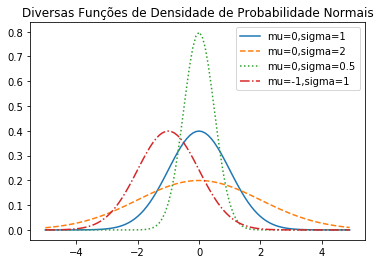

In [10]:
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Diversas Funções de Densidade de Probabilidade Normais")
plt.show()

### Teorema do Limite Central

* Diz que (em essência) uma variável aleatória definida como a média de uma grande quantidade de variáveis aleatórias distribuídas independente e identicamente é ela mesma aproximadamente distribuída normalmente.
* se x1,...,xn são variáveis aleatórias com média μ e desvio padrão σ, e se n for grande, então:

  $\frac{1}{n}(x1+...+xn)$
  
* está aproximadamente distribuída normalmente com média = 0 e desvio padrão = 1.
* Uma maneira simples de ilustrar isso é considerando as variáveis aleatórias binomiais, as quais possuem dois parâmetros n e p. Uma variável aleatória Binomial(n,p) é apenas a soma de n variáveis aleatórias independentes Bernoulli(p), e cada uma delas é igual a 1 com probabilidade p e 0 com probabilidade 1−p:

In [11]:
from random import random
def bernoulli_trial(p):
    return 1 if random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

* A média de uma variável Bernoulli(p) é p, e seu desvio padrão $\sqrt{p(1-p)}$.
* O teorema do limite central diz que, conforme n aumenta, a variável Binomial(n,p) é aproximadamente uma variável aleatória normal com a média μ = np e desvio padrão $\sigma = \sqrt{np(1-p)}$.
* O gráfico abaixo mostra a semelhança:

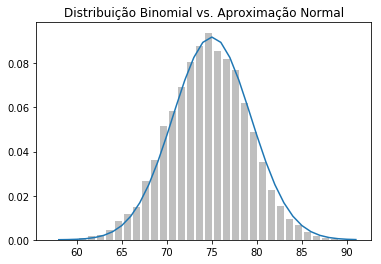

In [16]:
from collections import Counter
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]# usa um gráfico de barras para exibir as amostrar binomiais atuais
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
    [v / num_points for v in histogram.values()],
    0.8,
    color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # usa um gráfico de linhas para exibir uma aproximação da normal
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Distribuição Binomial vs. Aproximação Normal" )
    plt.show()
    
make_hist(0.75, 100, 10000)